In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import BatchNormalization

IMG_SIZE = (299, 299)
Type_class_names = ['Abrasions', 'Bruises', 'Burns', 'Cut',
                     'Diabetic Wounds','Laserationl', 'Normal', 'Pressure Wounds', 'Surgical Wounds', 'Venous Wounds']
class CustomBatchNormalization(BatchNormalization):
    def get_config(self):
        config = super().get_config()
        config['axis'] = -1
        return config

Type_model = load_model(
    r"C:\Users\ahmed\OneDrive\Desktop\Files\tasks\Type\wound_Type.h5",
    custom_objects={'CustomBatchNormalization': CustomBatchNormalization}
)

In [2]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {img_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, IMG_SIZE)
    img_preprocessed = preprocess_input(img_resized.astype('float32'))
    return np.expand_dims(img_preprocessed, axis=0), img_rgb

def classify_image(img_path):
    try:
        img_input, img_display = preprocess_image(img_path)

        plt.imshow(img_display)
        plt.axis('off')
        plt.title("Test Image")
        plt.show()

        Type_pred = Type_model.predict(img_input)[0]
        Wound_index = np.argmax(Type_pred)
        Wound_label = Type_class_names[Wound_index]
        Wound_conf = Type_pred[Wound_index] * 100

        print(f"Wound Type: {Wound_label} ({Wound_conf:.2f}%)")

    except Exception as e:
        print(str(e))


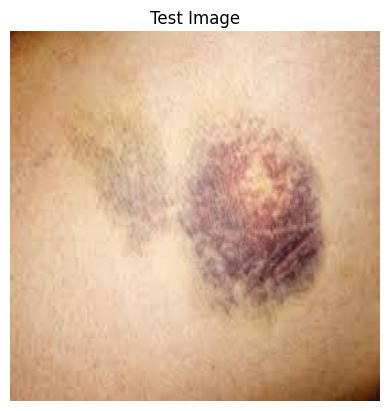

1/1 [==============================] - 1s 817ms/step
Wound Type: Bruises (100.00%)


In [3]:
img_path = r"C:\Users\ahmed\OneDrive\Desktop\Files\tasks\Type\Wound_dataset copy\Bruises\bruises (1).jpg"
classify_image(img_path)